Sales Performance Analysis and Forecasting

A sales_data dataset is selected from kaggle in order to perform Sales Performance Analysis for the year 2023. 

1. Data Collection and Exploration

In [41]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
#read and load the dataset
df = pd.read_csv("sales_data.csv")

In [43]:
df

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2/3/2023,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,4/21/2023,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,9/21/2023,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,8/24/2023,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,3/24/2023,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1010,4/15/2023,Charlie,North,4733.88,4,Food,4943.03,5442.15,Returning,0.29,Cash,Online,North-Charlie
995,1067,9/7/2023,Bob,North,4716.36,37,Clothing,1754.32,1856.40,New,0.21,Bank Transfer,Retail,North-Bob
996,1018,4/27/2023,David,South,7629.70,17,Clothing,355.72,438.27,Returning,0.06,Bank Transfer,Online,South-David
997,1100,12/20/2023,David,West,1629.47,39,Electronics,3685.03,3743.39,New,0.01,Bank Transfer,Online,West-David


In [44]:
#displaying the columns
df.columns

Index(['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel',
       'Region_and_Sales_Rep'],
      dtype='object')

In [45]:
#summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            999 non-null    int64  
 1   Sale_Date             999 non-null    object 
 2   Sales_Rep             999 non-null    object 
 3   Region                999 non-null    object 
 4   Sales_Amount          999 non-null    float64
 5   Quantity_Sold         999 non-null    int64  
 6   Product_Category      999 non-null    object 
 7   Unit_Cost             999 non-null    float64
 8   Unit_Price            999 non-null    float64
 9   Customer_Type         999 non-null    object 
 10  Discount              999 non-null    float64
 11  Payment_Method        999 non-null    object 
 12  Sales_Channel         999 non-null    object 
 13  Region_and_Sales_Rep  999 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.4+ KB


In [46]:
#converting date to datetime format
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])

In [47]:
#Time Granularity
print("Unique dates: ",df['Sale_Date'].nunique())
print("Date range: ", df['Sale_Date'].min(), "to", df['Sale_Date'].max())

Unique dates:  340
Date range:  2023-01-01 00:00:00 to 2024-01-01 00:00:00


In [48]:
#identifying the indexes having sales date jan-2024
df[df['Sale_Date'] == '2024/1/1']

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
317,1018,2024-01-01,Alice,West,8579.72,24,Electronics,1362.78,1729.81,New,0.29,Bank Transfer,Online,West-Alice
872,1098,2024-01-01,Bob,South,2370.72,11,Clothing,213.41,503.36,Returning,0.27,Bank Transfer,Online,South-Bob


In [49]:
#dropping indexes of jan-2024 
df = df.drop(index=[317, 872])

In [50]:
#Summary Statistics
df.describe()

,Product_ID,Sale_Date,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,997.000000,997,997.000000,997.000000,997.000000,997.000000,997.000000
mean,1050.084253,2023-07-02 04:32:58.736208640,5014.982166,25.354062,2481.108275,2734.094303,0.152257
min,1001.000000,2023-01-01 00:00:00,100.120000,1.000000,60.280000,167.120000,0.000000
25%,1024.000000,2023-03-30 00:00:00,2550.840000,13.000000,1247.100000,1510.430000,0.080000
50%,1051.000000,2023-06-30 00:00:00,5012.960000,25.000000,2471.670000,2707.110000,0.150000
75%,1075.000000,2023-10-11 00:00:00,7499.700000,38.000000,3703.930000,3964.630000,0.230000
max,1100.000000,2023-12-31 00:00:00,9989.040000,49.000000,4995.300000,5442.150000,0.300000
std,29.548390,NaN,2845.612715,14.163135,1415.685048,1417.360824,0.087056


2. Data Cleaning and transformation

In [51]:
#checking for null values
df.isnull().sum()

Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64

In [52]:
#check for duplicates
df.duplicated().sum()

np.int64(0)

In [53]:
#creating derived features from date(year, month, quarter)
df['Year'] = df['Sale_Date'].dt.year
df['Month'] = df['Sale_Date'].dt.month
df['Quarter'] = df['Sale_Date'].dt.quarter

In [54]:
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep,Year,Month,Quarter
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob,2023,2,1
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob,2023,4,2
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David,2023,9,3
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob,2023,8,3
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie,2023,3,1


In [55]:
plot = df[['Sales_Amount', 'Quantity_Sold', 'Unit_Cost', 'Unit_Price', 'Discount']]

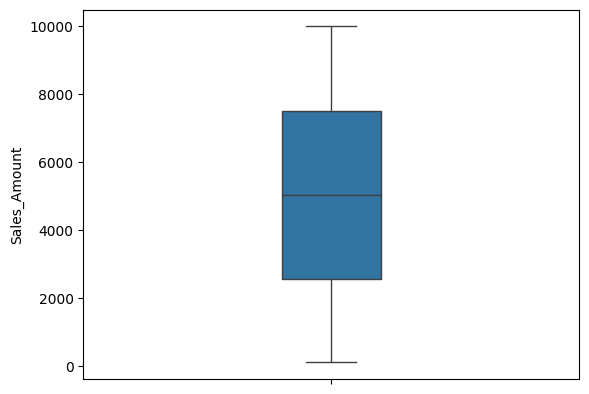

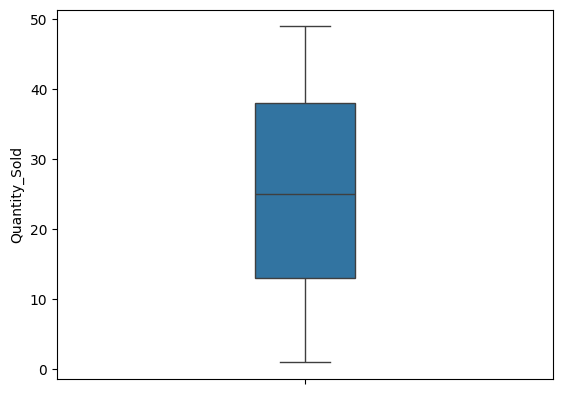

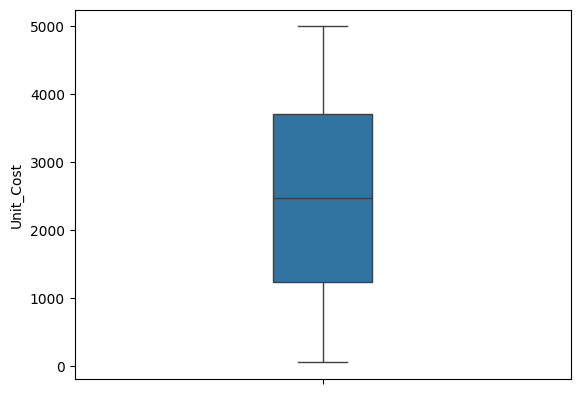

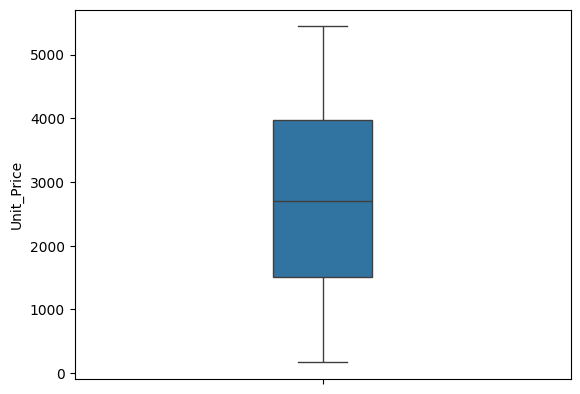

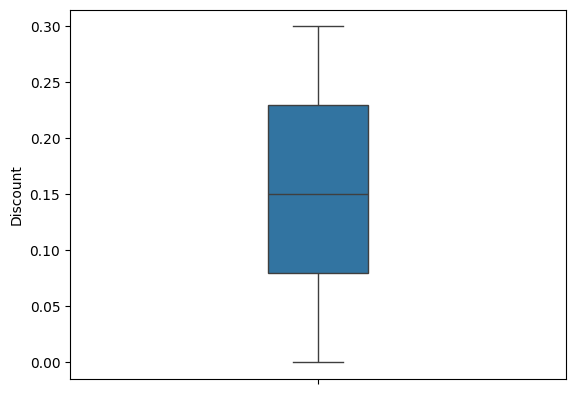

In [56]:
#checking for outliers through boxplot
for i in plot:
    sns.boxplot(plot[i], width=0.2)
    plt.show()

Observation: 
There are no outliers in sales, quantities sold, unit price, unit cost and discount for the sold product.

In [57]:
#encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['Product_Category', 'Region', 'Sales_Rep', 'Customer_Type', 'Payment_Method', 'Sales_Channel'])
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [58]:
#loading the encoded dataframe
df_encoded.head()

,Product_ID,Sale_Date,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount,Region_and_Sales_Rep,Year,Month,...,Sales_Rep_Charlie,Sales_Rep_David,Sales_Rep_Eve,Customer_Type_New,Customer_Type_Returning,Payment_Method_Bank Transfer,Payment_Method_Cash,Payment_Method_Credit Card,Sales_Channel_Online,Sales_Channel_Retail
0,1052,2023-02-03,5053.97,18,152.75,267.22,0.09,North-Bob,2023,2,...,0,0,0,0,1,0,1,0,1,0
1,1093,2023-04-21,4384.02,17,3816.39,4209.44,0.11,West-Bob,2023,4,...,0,0,0,0,1,0,1,0,0,1
2,1015,2023-09-21,4631.23,30,261.56,371.40,0.20,South-David,2023,9,...,0,1,0,0,1,1,0,0,0,1
3,1072,2023-08-24,2167.94,39,4330.03,4467.75,0.02,South-Bob,2023,8,...,0,0,0,1,0,0,0,1,0,1
4,1061,2023-03-24,3750.20,13,637.37,692.71,0.08,East-Charlie,2023,3,...,1,0,0,1,0,0,0,1,1,0


In [59]:
#create a new column profit
df['Profit'] = df['Unit_Price'] - df['Unit_Cost']

3. EDA(Exploratory Data Analysis)

Descriptive statistics

In [60]:
df.describe(include='object')

,Sales_Rep,Region,Product_Category,Customer_Type,Payment_Method,Sales_Channel,Region_and_Sales_Rep
count,997,997,997,997,997,997,997
unique,5,4,4,2,3,2,20
top,David,North,Clothing,New,Credit Card,Retail,North-Eve
freq,221,267,267,503,345,511,64


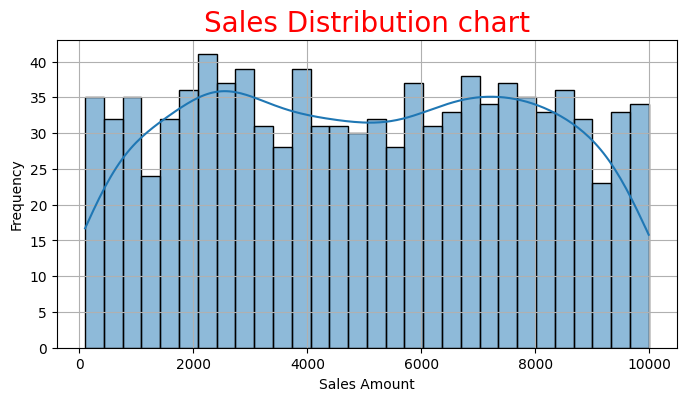

In [79]:
#checking revenue distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Sales_Amount'], bins=30, kde=True)
plt.title('Sales Distribution chart', size=20, color='red')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

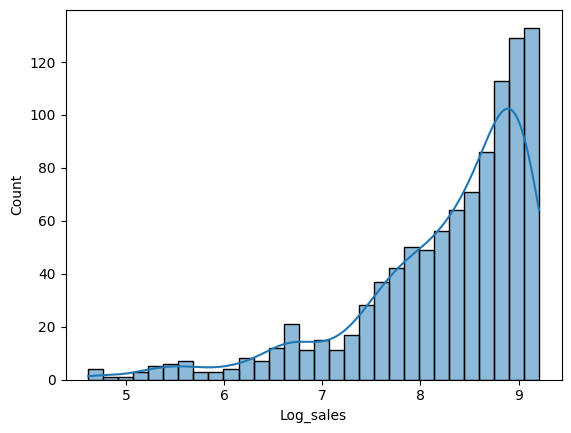

In [62]:
#converting sales amount to log for better visualization
df['Log_sales'] = np.log1p(df['Sales_Amount'])
sns.histplot(df['Log_sales'], bins=30, kde=True)
plt.show()

Observation:

The log chart shows left-skewed distribution indicating that the original raw sales distribution chart must have been right-skewed(many small sales, few large sales).

In [63]:
#Product sales variance
df.groupby('Product_Category')['Sales_Amount'].agg(['sum', 'mean', 'std']).sort_values('std', ascending=False)

,sum,mean,std
Product_Category,,,
Electronics,1234919.92,5040.489469,2880.912347
Furniture,1260517.69,4848.144962,2879.817388
Clothing,1311103.64,4910.500524,2834.407791
Food,1193395.97,5303.982089,2775.785257


Observations: 

1. Food sales are likely the most stable(lowest std) and highest per sale(highest average), suggesting consistent and high spending per food item.
2. Electronic products show the most inconsistency in sale(highest std), indicating that some people buy cheap whereas some buy expensive products in this category.
3. Clothing has the highest overall sales(highest sum), suggesting it is the most purchased category.
4. Furniture has lowest average sales(lowest average) and variability almost as high as Electronics(2nd highest std), indicating inconsistent purpase amount despite lower average spending.

In [64]:
#Customer region behavior
max_region = df.groupby('Region')['Sales_Amount'].sum().idxmax()
min_region = df.groupby('Region')['Sales_Amount'].sum().idxmin()
max_region_val = df.groupby('Region')['Sales_Amount'].sum().max()
min_region_val = df.groupby('Region')['Sales_Amount'].sum().min()
print(f"{max_region} has the highest sales: ${max_region_val}.")
print(f"{min_region} has the lowest sales: ${min_region_val}.")

North has the highest sales: $1369612.51.
South has the lowest sales: $1151880.14.


In [65]:
#check total number of products bought from each region
df.groupby('Region')['Product_ID'].count().sort_values(ascending=False)

Region
North    267
East     262
West     243
South    225
Name: Product_ID, dtype: int64

In [66]:
#check for total revenue and quantities sold in each region
df.groupby('Region')[['Sales_Amount', 'Quantity_Sold']].sum().sort_values(by='Quantity_Sold', ascending=False)

,Sales_Amount,Quantity_Sold
Region,,
North,1369612.51,6705
West,1227029.21,6462
East,1251415.36,6314
South,1151880.14,5797


Observation:

The North region generated the highest total sales revenue with the highest number of product purchased, while the South region generated the lowest with the lowest number of products purchased.

Visualization

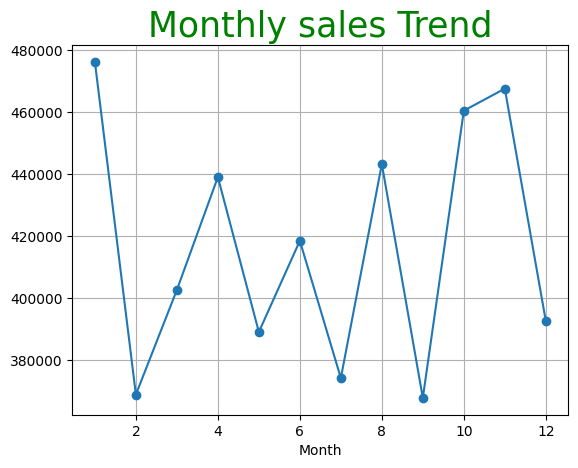

In [67]:
#line chart for monthly sales trend
monthly_sales = df.groupby('Month')['Sales_Amount'].sum()
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly sales Trend', size= 25, color='g')
plt.grid(True)
plt.show()

Observation: 

The monthly sales trend shows significant fluctuations, indicating unstable sales performance throughout the year

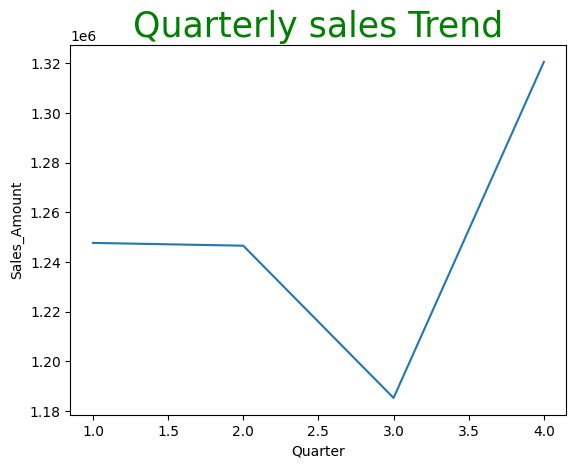

In [68]:
#line chart for quarterly sales trend
quarterly_sales = df.groupby('Quarter')['Sales_Amount'].sum()
sns.lineplot(quarterly_sales)
plt.title('Quarterly sales Trend', size= 25, color='g')
plt.show()

Observation: 

The quarterly sales trend shows stable sales during 1st and 2nd quarter of the year, experiencing significant drop in the 3rd quarter and finally, steep increase in sales during the 4th quarter(holiday season).

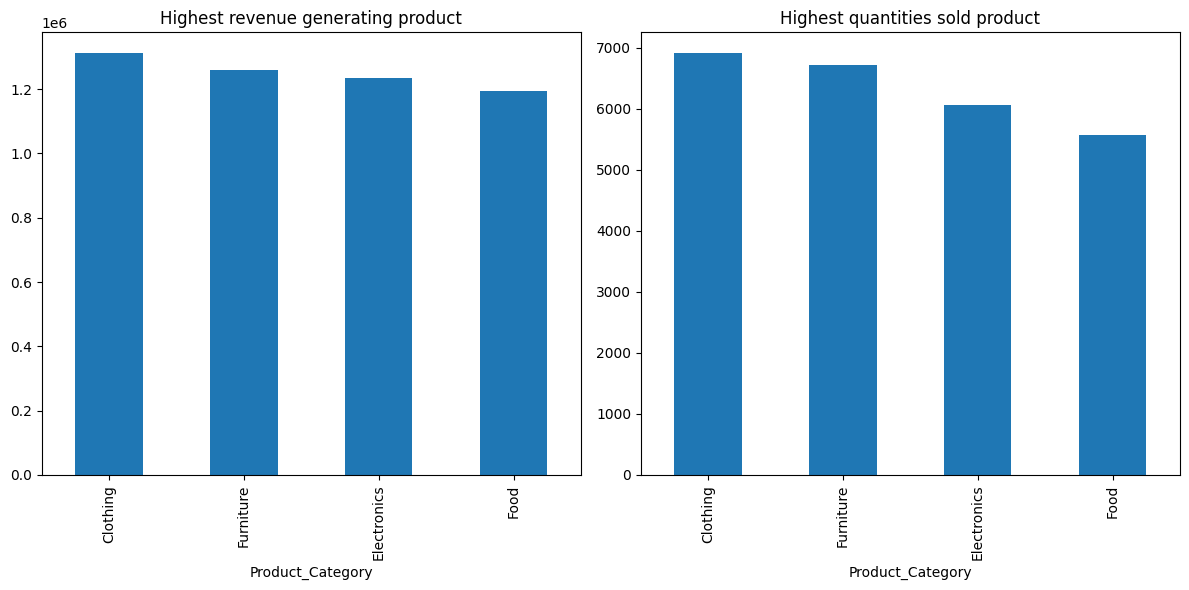

In [69]:
#bar chart for high performing product
high_revenue_product = df.groupby('Product_Category')['Sales_Amount'].sum().sort_values(ascending=False)
high_quantity_product = df.groupby('Product_Category')['Quantity_Sold'].sum().sort_values(ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
high_revenue_product.plot(kind='bar', ax=axes[0], title='Highest revenue generating product')
high_quantity_product.plot(kind='bar', ax=axes[1], title='Highest quantities sold product')
plt.tight_layout()
plt.show()

Observation: 

The bargraph shows Top performing product category according to both, revenue and quantity sold, is Clothing and the least performing product category to be Food.

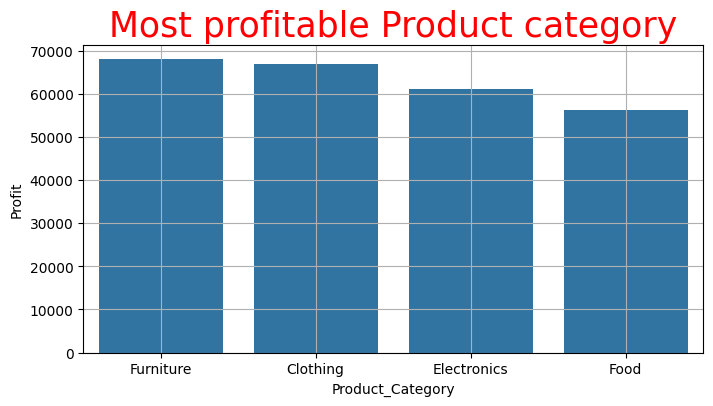

In [70]:
#find the most profitable product category
plt.figure(figsize=(8,4))
most_profitable = df.groupby('Product_Category')['Profit'].sum().sort_values(ascending=False)
sns.barplot(most_profitable)
plt.title('Most profitable Product category', color='r', size=25)
plt.grid(True)
plt.show()

Observation: 

The most profitable product category is Furniture. But there is no extreme difference in profit levels between the product categories.

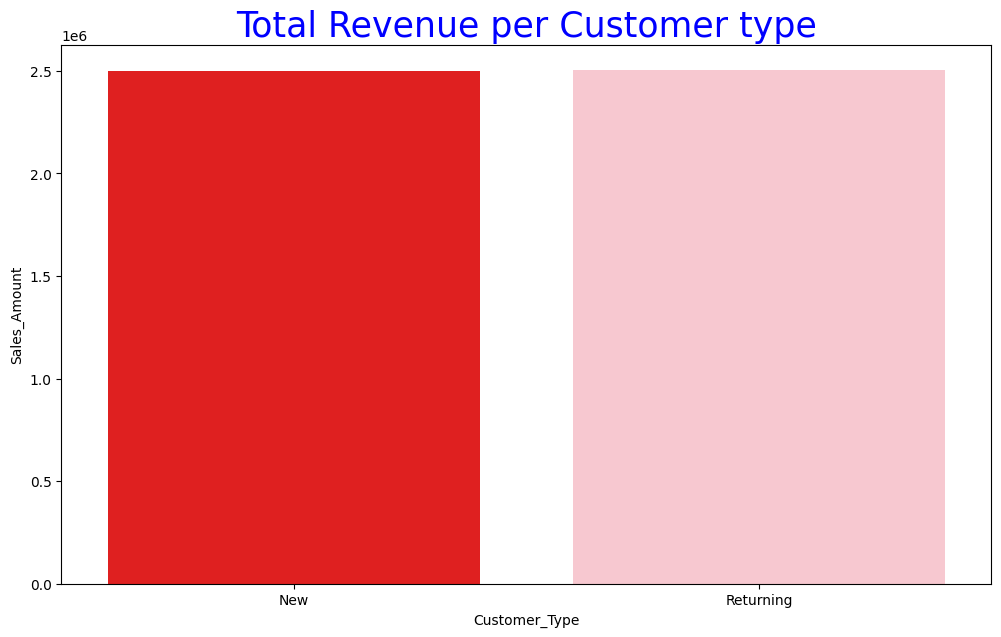

In [71]:
#Revenue generated per customer type
sales_comparison = df.groupby('Customer_Type')['Sales_Amount'].sum().reset_index()
plt.figure(figsize=(12,7))
sns.barplot(data=sales_comparison, x = 'Customer_Type', y = 'Sales_Amount', hue = 'Customer_Type', palette=['red', 'pink'])
plt.title('Total Revenue per Customer type', color='blue', size=25)
plt.show()

Observation: 

The total sales from new and returning customers is nearly identical, which is approximately $2.5million.

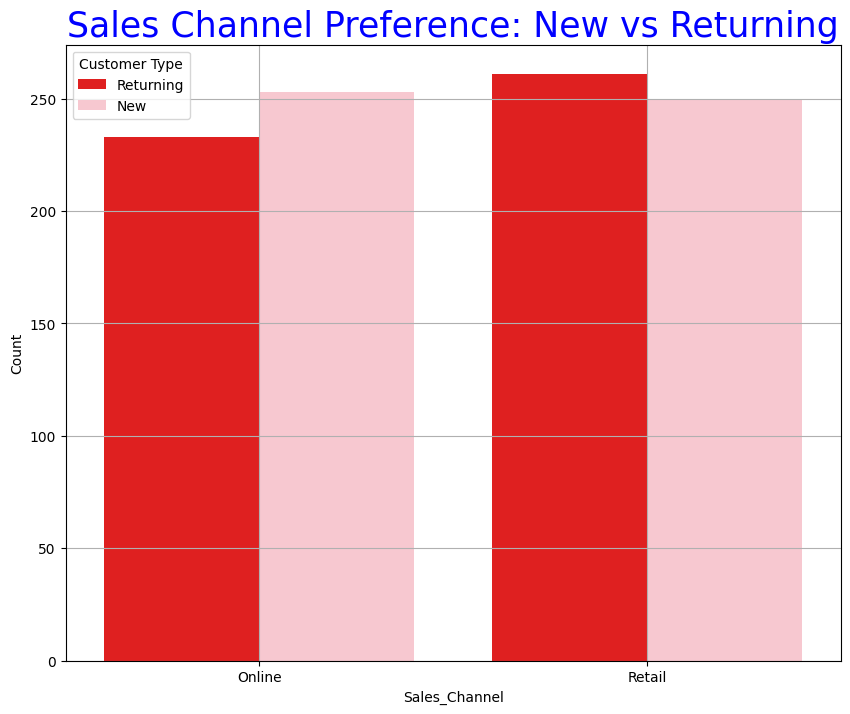

In [72]:
#Sales channel preference 
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='Sales_Channel', hue = 'Customer_Type', palette=['red', 'pink'])
plt.title('Sales Channel Preference: New vs Returning', size=25, color='blue')
plt.ylabel('Count')
plt.legend(title='Customer Type', loc='best')
plt.grid(True)
plt.show()

Observations:

1. New customers prefer online shopping slightly more than returning customers.
2. Returning customers prefer shopping in retail stores more than new customers.

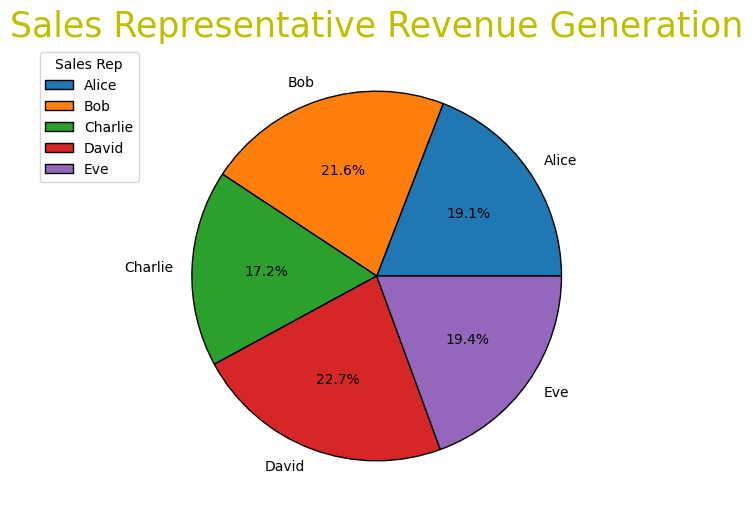

In [73]:
#find the top Sales representatives according to revenue generated
sales_rep = df.groupby('Sales_Rep')['Sales_Amount'].sum()
sales_rep.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), wedgeprops={'edgecolor':'black'})
plt.title('Sales Representative Revenue Generation', size= 25, color='y')
plt.legend(title='Sales Rep',bbox_to_anchor=(0,1))
plt.ylabel('')
plt.show()

Observations:

1. David performs best out of all 5 representatives with Bob performing fairly close to him.
2. Eve and Alice perform similarly with moderate sales each. 
3. Charlie performs the least out of all, making him the weakest revenue generator.

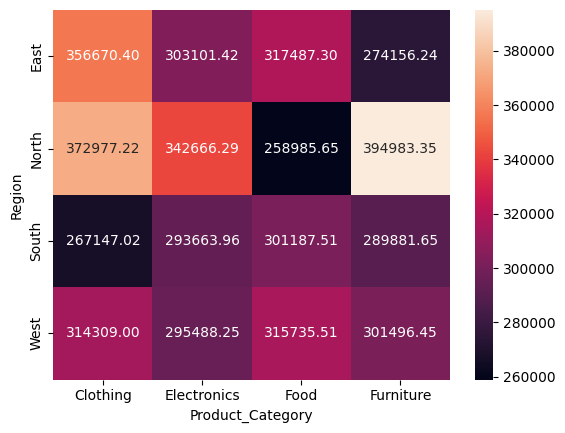

In [74]:
#heatmap to correlate product & region
cor1 = df.pivot_table(index='Region', columns='Product_Category', values='Sales_Amount', aggfunc='sum')
sns.heatmap(cor1, annot=True, fmt='.2f')
plt.show()

Observation:

1. East and West regions are quite stable across all categories.
2. Food sales in North is a potential outlier, but profitable in other categories.
3. South has consistent low sales across the board.

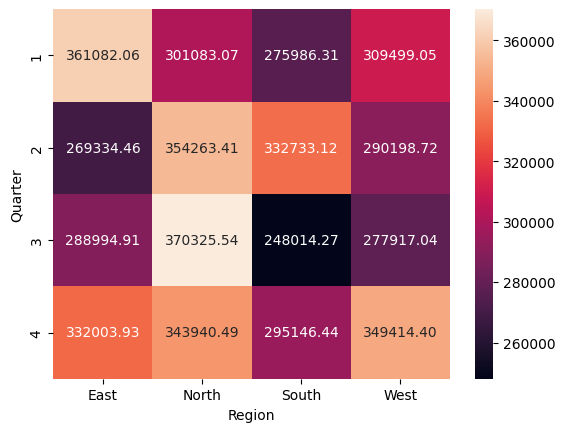

In [75]:
#heatmap to correlate time(quarter) & region
cor2 = df.pivot_table(index='Quarter', columns='Region', values='Sales_Amount', aggfunc='sum')
sns.heatmap(cor2, annot=True, fmt='.2f')
plt.show()

Observation:

1. North is a consistently top-performing region across all quarters.
2. West is stable and strong.
3. South is inconsistent with peak in 2nd quarter but steep drop in 3rd quarter.
4. East performs well during 1st and 4th quarter(indicating seasonality) and drops during the mid quarters.

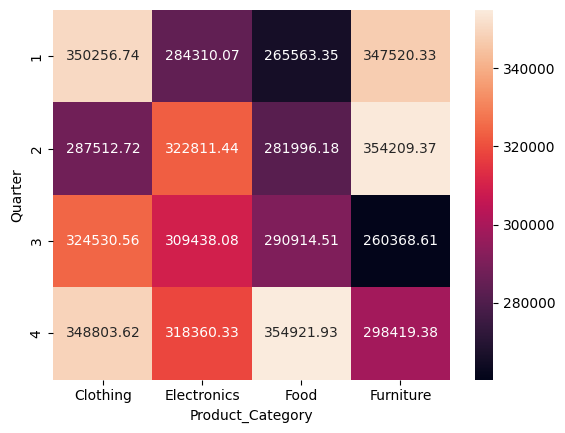

In [76]:
#heatmap to correlate time(quarter) & product
cor3 = df.pivot_table(index='Quarter', columns='Product_Category', values='Sales_Amount', aggfunc='sum')
sns.heatmap(cor3, annot=True, fmt='.2f')
plt.show()

Observations: 

1. 4th quarter is the strongest for all product categories.
2. Furniture is volatile, peak in 2nd quarter and drop in 3rd.
3. Food shows consistent growth from 1st to 4th quarter.
4. Clothing and Eletronic show potential seasonal behavior, 1st and 4th quarter being the best.

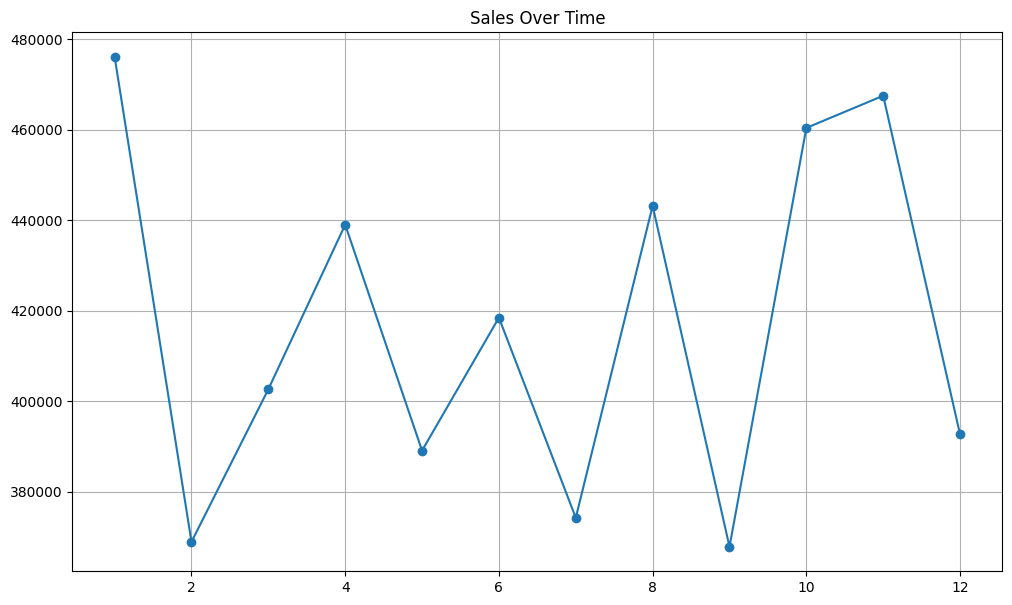

In [77]:
#seasonality and cyclic patterns analysis(monthly)
plt.figure(figsize=(12,7))
plt.plot(monthly_sales, marker='o')
plt.title("Sales Over Time")
plt.grid(True)
plt.show()

Observation: 

The figure depict no clear seasonality, there may be a possible mild cyclic behavior but, it is not well defined.

C:\Users\User\AppData\Local\Temp\ipykernel_11948\4058200875.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sale = df.set_index('Sale_Date').resample('M')['Sales_Amount'].sum().reset_index()
12:40:14 - cmdstanpy - INFO - Chain [1] start processing
12:40:14 - cmdstanpy - INFO - Chain [1] done processing


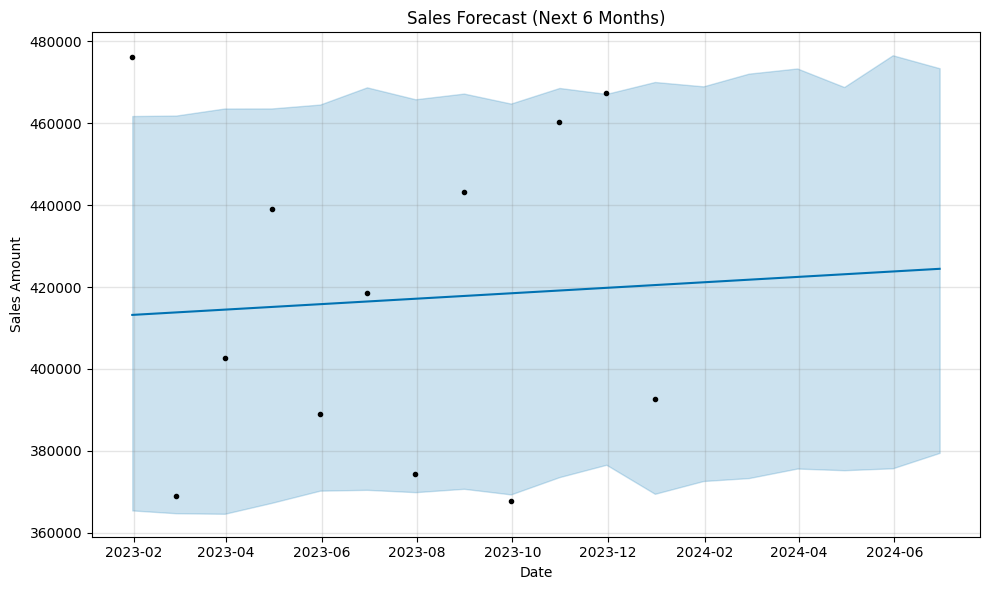

In [88]:
#basic forecasting using Prophet
from prophet import Prophet #type: ignore
monthly_sale = df.set_index('Sale_Date').resample('M')['Sales_Amount'].sum().reset_index()
monthly_sale.columns = ['ds', 'y']

#fit the model
model = Prophet()
model.fit(monthly_sale)

#creating future dataframe (next 6 months)
future = model.make_future_dataframe(periods=6, freq='ME')
forecast = model.predict(future)

#plotting the result
model.plot(forecast)
plt.title("Sales Forecast (Next 6 Months)")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.tight_layout()
plt.show()

Observation: 

The forecast shows a slight upward trend in sales over the next 6 months, but with high uncertainty due to limited and variable historical data.

KEY INSIGHTS:

1. No Significant Outliers Detected: 
suggesting a relatively clean dataset for modeling.

2. Sales Distribution is Right-Skewed: 
This was addressed using a log transformation for better visualization.

3. Successful Categorical Encoding: 
suitable for input to ML models or advanced statistical analysis.

4. Basic Forecast with Prophet Indicates Slight Upward Trend: 
Prophet model forecasted a mild increase in sales over the next 6 months, with predictions staying within a wide uncertainty band, likely due to a limited time range of historical data.

5. High Forecast Uncertainty: 
The wide confidence interval in the Prophet plot implies high variability in historical sales, reducing the model's confidence in future predictions.

6. Seasonality was not identified: 
Because the data only covered approximately one year, Prophet was unable to detect clear yearly seasonality, which generally requires at least two full cycles(24 months atleast).